In [1]:
import numpy as np
from preprocessing import ConstantLengthDataGenerator, plot
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data_path = './data/concatenated'
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (60555,)
y shape: (60555, 1)


In [3]:
X[0]

0      -0.584754
1      -0.584754
2       1.730991
3      -0.584754
4      -0.584754
          ...   
1455   -0.584734
1456   -0.583729
1457   -0.578603
1458    1.732726
1459   -0.584734
Length: 1460, dtype: float64

In [4]:
y[0]

array(['ACSF1_9'], dtype='<U42')

In [5]:
generator = ConstantLengthDataGenerator(X, y, batch_size=8, max_length=16)

In [6]:
X_batch, y_batch = next(generator)
X_batch

array([[-0.2    , -0.1962 , -0.1862 , -0.1686 , -0.1512 , -0.1494 ,
        -0.1669 , -0.1754 , -0.1707 , -0.159  , -0.1276 , -0.0898 ,
        -0.0737 , -0.08624, -0.1134 , -0.1393 ],
       [-0.879  , -0.8574 , -0.845  , -0.85   , -0.858  , -0.862  ,
        -0.88   , -0.893  , -0.891  , -0.8804 , -0.8667 , -0.8564 ,
        -0.8525 , -0.8525 , -0.8613 , -0.8633 ],
       [-3.693  , -3.729  , -3.61   , -3.541  , -3.428  , -3.389  ,
        -3.389  , -3.42   , -3.375  , -3.291  , -3.188  , -3.203  ,
        -3.123  , -3.09   , -3.098  , -3.086  ],
       [-0.85   , -0.771  , -0.694  , -0.614  , -0.5337 , -0.453  ,
        -0.3718 , -0.2925 , -0.2125 , -0.1309 , -0.0491 ,  0.03278,
         0.1122 ,  0.1943 ,  0.2756 ,  0.3577 ],
       [-0.6626 , -0.652  , -0.6274 , -0.6123 , -0.6016 , -0.6006 ,
        -0.6006 , -0.598  , -0.592  , -0.586  , -0.605  , -0.666  ,
        -0.6943 , -0.6787 , -0.671  , -0.6426 ],
       [-0.1718 , -0.1638 , -0.1938 , -0.2097 , -0.22   , -0.2373 ,
       

In [7]:
y_batch

array([['NonInvasiveFetalECGThorax1_32'],
       ['NonInvasiveFetalECGThorax2_41'],
       ['Worms_5'],
       ['Adiac_34'],
       ['GestureMidAirD2_3'],
       ['PigAirwayPressure_4'],
       ['Adiac_29'],
       ['AllGestureWiimoteX_9']], dtype='<U42')

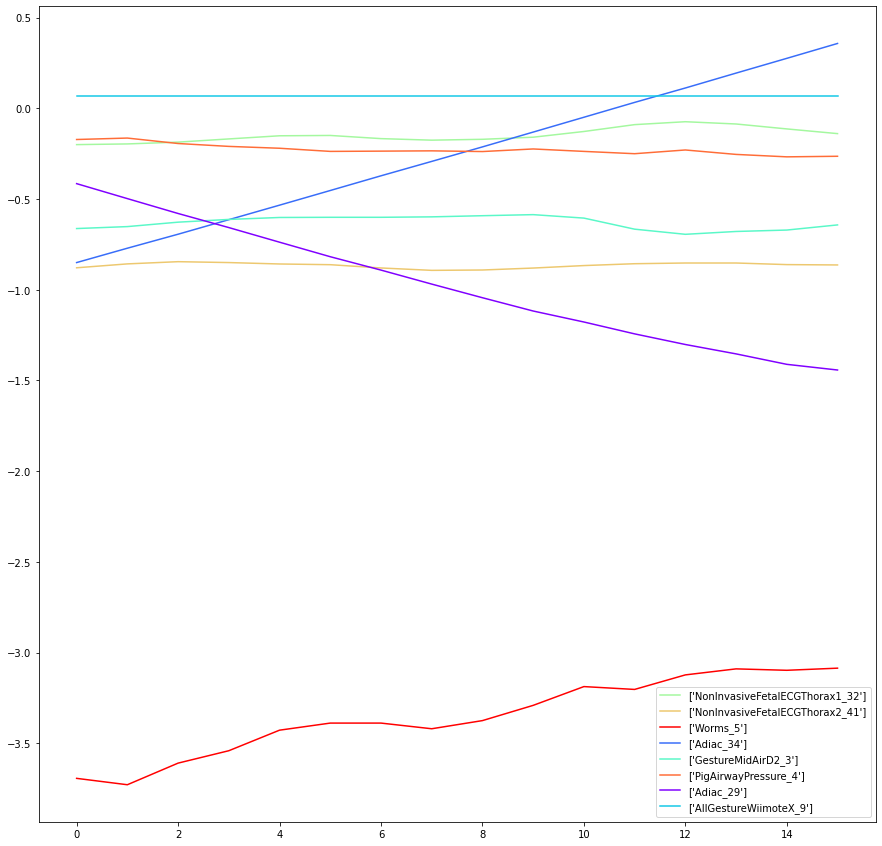

In [8]:
plot(X_batch, y_batch)
plt.legend(y_batch)

In [9]:
classes = []
for i in range(5000):
    _, y = next(generator)
    classes += y.ravel().tolist()

counts = Counter(classes)
counts

KeyboardInterrupt: 

In [ ]:
_ = plt.bar(*zip(*counts.items()))